# <font color = "#F3A505" > ElasticNet
 
    
<hr>

In this exercise, we are trying to apply both L1 and L2 regularization methods to previously constructed OLS regression and compare their results with simple OLS or LAD regression. 

We are going to define new objective functions for our optimization problems, hence the LAD and OLS variants of linear/polynomial regression are developed. We are also going to define new costs for these objective function, hence the L1 and L2 regularization are prefromed on our optimization problems. The difference between current and preious exercise is that, we are going to make use of both L1 and L2 regularizations/.
    
    
    
Our **goal** for this excerice is to compare these methods on various datasets. 
    
In other words : for each dataset we create multiple models using simple (LAD or OLS) regression or regularized (L1 and L2) regression; Then we compare these results to find the best model that can fit our data. 
    
<hr> 
    
Everything required for this exercise is available at : 
   
 
    
   
***GitHub***  : <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU.git" > Main (class) repo </a> 
    &nbsp;&nbsp;&nbsp;
    <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU/tree/main/Questions/Q-Series4" > This Document page</a>
    
    
***GoogleDrive*** : <a href = "" > Not available ATM </a>

# <font color = "#F3A505" > Import libraries
    
<hr>
 
    
It is essential that we first load these libraries in our code so that it can work.
    
-  numpy, pandas, matplotlib are all necessary libraries to perform simple tasks on our data such as reading, creating dataframes, visualizing, mathematical operations, etc.
   
    
    
-  sklearn LinearRegression is used to create OLS regression (linear regression of common knowledge).

    
    
-  sklearn PolynomialFeatures is used to create OLS polynomial regression (linear regression on polynomial features).
    
    
    
-  sklearn ElasticNet is used to perform both L1 and L2 regularization on OLS regression. 
    
    
    
-  sklego LADRegression is used to create LAD regression (Least Absolute Deviation/Error)
    

    
- sklearn mean_absolute_error and mean_squared_error are used to evaluate our model.
    
    
If you don't have any/some of these installed, please <code> pip install </code> them


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error  as MSE

# <font color = "#F3A505" > Import data
    
<hr>
    
Data primary path is in a directory called  "**Data** " which is located in the main directory. In Data directory there is another directory calld Q2S4 which contains more directories, each of them corresponds to a dataset. One of them is a numerical data which goes by the name 'Train' and 'Test'. The other one is  a modified verstion of diabetes where x is one of the features and have multiple outliers.   
    

If for any reason the data is not available in the *Data* directory, Use the links above to download the data and place them at the appropriate location. Just choose the proper *path* according to the location you use to place your datasets so the other lines of the code can function properly.


In [2]:
path = '../Data/Q2S4/'

diabetes_x_train = pd.read_csv(path + '1/X_train.csv')
diabetes_y_train = pd.read_csv(path + '1/Y_train.csv')
diabetes_x_test  = pd.read_csv(path + '1/X_test.csv')
diabetes_y_test  = pd.read_csv(path + '1/Y_test.csv')


Train  = pd.read_csv(path + '2/Train.csv')
TrainX = Train['x']
TrainY = Train['t']
Test = pd.read_csv(path + '2/Test.csv')
TestX = Test['x']
TestY = Test['t']


# <font color = "#F3A505" > Sort Datasets
    
<hr>
    
    
Sorting the data is important as it helps to plot the data much smoother.

In [3]:
dataframe = pd.DataFrame(
        {'x' :diabetes_x_train.values.flatten() , 't' : diabetes_y_train.values.flatten()}).sort_values(by= 'x')

diabetes_x_train = dataframe['x']
diabetes_y_train = dataframe['t']

dataframe = pd.DataFrame(
        {'x' :diabetes_x_test.values.flatten() , 't' : diabetes_y_test.values.flatten()}).sort_values(by= 'x')

diabetes_x_test = dataframe['x']
diabetes_y_test = dataframe['t']


Train = Train.sort_values(by = 'x')
Test  = Test.sort_values(by = 't')

TrainX = Train['x']
TrainY = Train['t']

TestX = Test['x']
TestY = Test['t']


# <font color = "#F3A505" > Polynomial Features
    
<hr>
    
Since the degree of polynomial regression is not defined, we are using 3 degree (1 , 2 , 3) to create the basic polynomial regression. In doing so, we create 3 polynomials so that they will be used to convert our x data into $\Phi$. 

In [4]:
M = [1,2,3]
polynomials = {}

for _degree in M:
    polynomials[_degree] = PolynomialFeatures(degree = _degree)

# <font color = "#F3A505" > ElasticNet
    
<hr>
   
    
ElasticNet is linear regression with combined L1 and L2 priors as regularizer and minimizes the objective function:
    
$
\min \frac{1}{2\times N}||\Phi W - Y ||^2_2 + \alpha \times \text{l1_ratio} ||W||_1 + 0.5 \alpha \times (1 - \text{l1_ratio}) ||W||^2_2
$
 
Lets assume :
    
$
a * ||W||_1 + 0.5 * b * ||W||_2^2 
$
    
Then 
    
$
\alpha = a + b 
$ and 
$
\text{l1_ratio} = \frac{a}{a+b}
$
    
Specifically, l1_ratio = 1 is the Lasso penalty and l1_ratio = 0  is Ridge penalty.
    
    
In this exercise, we are going to choose 10 l1_ratio between 0 and 1 with step length of 0.1.

In [5]:
ratio = np.arange(0,1.1,0.1)

# <font color = "#F3A505" > Models
    
<hr>
   
For each type of datasets :    
And for each degree and each ratio (3 x 10) a model is created, then (2 x 3) extra models of LAD and OLS on different degrees are created.
   
    
These models are save in diabetes_models and second_models. The models can be obtained using <code> [ratio / 'LAD' / 'OLS]</code> and <code>[degree]</code>.
    
    
Sometimes these models do not converge, therefore it may be required to increase their maximum iteration rate.

In [7]:
diabetes_models = {}
second_models   = {}



for _r in ratio:
    
    _models = {}
    for M in [1,2,3]:
        
        # diabetes
        
        x_new = polynomials[M].fit_transform(diabetes_x_train.values.reshape(-1,1))
        
        model = ElasticNet(alpha= 0.25 ,fit_intercept=False, l1_ratio= _r)
        model.fit(x_new, diabetes_y_train)
        _models[M] = model
        
    diabetes_models[_r] = _models  
 
    
_models = {}

for M in [1,2,3]:
    
    # diabetes
    
    model = LADRegression(fit_intercept=False)
    x_new = polynomials[M].fit_transform(diabetes_x_train.values.reshape(-1,1))
    model.fit(x_new, diabetes_y_train)
    _models[M] = model
    
diabetes_models['LAD'] = _models

_models = {}

for M in [1,2,3]:
    
    # diabetes
    
    model = LinearRegression(fit_intercept=False)
    x_new = polynomials[M].fit_transform(diabetes_x_train.values.reshape(-1,1))
    model.fit(x_new, diabetes_y_train)
    _models[M] = model
    
diabetes_models['OLS'] = _models



for _r in ratio:
    
    _models = {}
    for M in [1,2,3]:
        
        # second directory models
        
        x_new = polynomials[M].fit_transform(TrainX.values.reshape(-1,1))
        
        model = ElasticNet(fit_intercept=False, l1_ratio= _r)
        model.fit(x_new, TrainY)
        _models[M] = model
        
    second_models[_r] = _models 
    
    
    
_models = {}

for M in [1,2,3]:
    
    # second directory models
    
    model = LADRegression(fit_intercept=False)
    x_new = polynomials[M].fit_transform(TrainX.values.reshape(-1,1))
    model.fit(x_new, TrainY)
    _models[M] = model
    
second_models['LAD'] = _models

_models = {}

for M in [1,2,3]:
    
    # second directory models
    
    model = LinearRegression(fit_intercept=False)
    x_new = polynomials[M].fit_transform(TrainX.values.reshape(-1,1))
    model.fit(x_new, TrainY)
    _models[M] = model
    
second_models['OLS'] = _models


C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.841e+06, tolerance: 1.875e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.841e+06, tolerance: 1.875e+03 Linear regression models with null weight for the l1 regularization term are more ef

# <font color = "#F3A505" > diabetes Test and Evaluation
    
<hr>
 
    
Once the models are created, we need to test and evaluate them. To do that, We created a set of variables each corresponds to a specific evaluation type or estimation of train or test datasets on a model. 

In [8]:
# diabetes

MSE_tr_d1 = []
MAE_tr_d1 = []
MSE_te_d1 = []
MAE_te_d1 = []
Yhat_tr_d1= []
Yhat_te_d1= []

MSE_tr_d2 = []
MAE_tr_d2 = []
MSE_te_d2 = []
MAE_te_d2 = []
Yhat_tr_d2= []
Yhat_te_d2= []

MSE_tr_d3 = []
MAE_tr_d3 = []
MSE_te_d3 = []
MAE_te_d3 = []
Yhat_tr_d3= []
Yhat_te_d3= []

# ElasticNet

for _r in ratio:
    
    # diabetes degree 1 (simple linear regression)
    
    yhat_train = diabetes_models[_r][1].predict(polynomials[1].fit_transform(diabetes_x_train.values.reshape(-1,1)))
    yhat_test  = diabetes_models[_r][1].predict(polynomials[1].fit_transform(diabetes_x_test.values.reshape(-1,1)))
    
    Yhat_tr_d1.append(yhat_train)
    Yhat_te_d1.append(yhat_test)
    
    MSE_tr_d1.append(MSE(diabetes_y_train, yhat_train))
    MSE_te_d1.append(MSE(diabetes_y_test, yhat_test))
    
    MAE_tr_d1.append(MAE(diabetes_y_train, yhat_train))
    MAE_te_d1.append(MAE(diabetes_y_test, yhat_test))
    
    # diabetes degree 2
    
    yhat_train = diabetes_models[_r][2].predict(polynomials[2].fit_transform(diabetes_x_train.values.reshape(-1,1)))
    yhat_test  = diabetes_models[_r][2].predict(polynomials[2].fit_transform(diabetes_x_test.values.reshape(-1,1)))
    
    Yhat_tr_d2.append(yhat_train)
    Yhat_te_d2.append(yhat_test)
    
    MSE_tr_d2.append(MSE(diabetes_y_train, yhat_train))
    MSE_te_d2.append(MSE(diabetes_y_test, yhat_test))
    
    MAE_tr_d2.append(MAE(diabetes_y_train, yhat_train))
    MAE_te_d2.append(MAE(diabetes_y_test, yhat_test))
    
    # diabetes degree 3
    
    yhat_train = diabetes_models[_r][3].predict(polynomials[3].fit_transform(diabetes_x_train.values.reshape(-1,1)))
    yhat_test  = diabetes_models[_r][3].predict(polynomials[3].fit_transform(diabetes_x_test.values.reshape(-1,1)))
    
    Yhat_tr_d3.append(yhat_train)
    Yhat_te_d3.append(yhat_test)
    
    MSE_tr_d3.append(MSE(diabetes_y_train, yhat_train))
    MSE_te_d3.append(MSE(diabetes_y_test, yhat_test))

    MAE_tr_d3.append(MAE(diabetes_y_train, yhat_train))
    MAE_te_d3.append(MAE(diabetes_y_test, yhat_test))
  
 
    
# LAD 

yhat_LAD_tr_d1 = diabetes_models['LAD'][1].predict(polynomials[1].fit_transform(diabetes_x_train.values.reshape(-1,1)))
MSE_LAD_tr_d1  = MSE(diabetes_y_train, yhat_LAD_tr_d1)
MAE_LAD_tr_d1  = MAE(diabetes_y_train, yhat_LAD_tr_d1)

yhat_LAD_tr_d2 = diabetes_models['LAD'][2].predict(polynomials[2].fit_transform(diabetes_x_train.values.reshape(-1,1)))
MSE_LAD_tr_d2  = MSE(diabetes_y_train, yhat_LAD_tr_d2)
MAE_LAD_tr_d2  = MAE(diabetes_y_train, yhat_LAD_tr_d2)

yhat_LAD_tr_d3 = diabetes_models['LAD'][3].predict(polynomials[3].fit_transform(diabetes_x_train.values.reshape(-1,1)))
MSE_LAD_tr_d3  = MSE(diabetes_y_train, yhat_LAD_tr_d3)
MAE_LAD_tr_d3  = MAE(diabetes_y_train, yhat_LAD_tr_d3)

yhat_LAD_te_d1 = diabetes_models['LAD'][1].predict(polynomials[1].fit_transform(diabetes_x_test.values.reshape(-1,1)))
MSE_LAD_te_d1  = MSE(diabetes_y_test, yhat_LAD_te_d1)
MAE_LAD_te_d1  = MAE(diabetes_y_test, yhat_LAD_te_d1)

yhat_LAD_te_d2 = diabetes_models['LAD'][2].predict(polynomials[2].fit_transform(diabetes_x_test.values.reshape(-1,1)))
MSE_LAD_te_d2  = MSE(diabetes_y_test, yhat_LAD_te_d2)
MAE_LAD_te_d2  = MAE(diabetes_y_test, yhat_LAD_te_d2)

yhat_LAD_te_d3 = diabetes_models['LAD'][3].predict(polynomials[3].fit_transform(diabetes_x_test.values.reshape(-1,1)))
MSE_LAD_te_d3  = MSE(diabetes_y_test, yhat_LAD_te_d3)
MAE_LAD_te_d3  = MAE(diabetes_y_test, yhat_LAD_te_d3)


# OLS

yhat_OLS_tr_d1 = diabetes_models['OLS'][1].predict(polynomials[1].fit_transform(diabetes_x_train.values.reshape(-1,1)))
MSE_OLS_tr_d1  = MSE(diabetes_y_train, yhat_OLS_tr_d1)
MAE_OLS_tr_d1  = MAE(diabetes_y_train, yhat_OLS_tr_d1)

yhat_OLS_tr_d2 = diabetes_models['OLS'][2].predict(polynomials[2].fit_transform(diabetes_x_train.values.reshape(-1,1)))
MSE_OLS_tr_d2  = MSE(diabetes_y_train, yhat_OLS_tr_d2)
MAE_OLS_tr_d2  = MAE(diabetes_y_train, yhat_OLS_tr_d2)

yhat_OLS_tr_d3 = diabetes_models['OLS'][3].predict(polynomials[3].fit_transform(diabetes_x_train.values.reshape(-1,1)))
MSE_OLS_tr_d3  = MSE(diabetes_y_train, yhat_OLS_tr_d3)
MAE_OLS_tr_d3  = MAE(diabetes_y_train, yhat_OLS_tr_d3)

yhat_OLS_te_d1 = diabetes_models['OLS'][1].predict(polynomials[1].fit_transform(diabetes_x_test.values.reshape(-1,1)))
MSE_OLS_te_d1  = MSE(diabetes_y_test, yhat_OLS_te_d1)
MAE_OLS_te_d1  = MAE(diabetes_y_test, yhat_OLS_te_d1)

yhat_OLS_te_d2 = diabetes_models['OLS'][2].predict(polynomials[2].fit_transform(diabetes_x_test.values.reshape(-1,1)))
MSE_OLS_te_d2  = MSE(diabetes_y_test, yhat_OLS_te_d2)
MAE_OLS_te_d2  = MAE(diabetes_y_test, yhat_OLS_te_d2)

yhat_OLS_te_d3 = diabetes_models['OLS'][3].predict(polynomials[3].fit_transform(diabetes_x_test.values.reshape(-1,1)))
MSE_OLS_te_d3  = MSE(diabetes_y_test, yhat_OLS_te_d3)
MAE_OLS_te_d3  = MAE(diabetes_y_test, yhat_OLS_te_d3)


# <font color = "#F3A505" > diabetes MSE and MAE visualization
    
<hr>
 
    
Once the models are evaluated, we can used these results to choose the best model according to our ration.]
    
First 6 plots, each correspond to ElasticNet method using 10 different ratio values and 3 degrees of polynomial.
Second 4 plots, each correspond to LAD and OLS method using 3 degrees of polnomial.

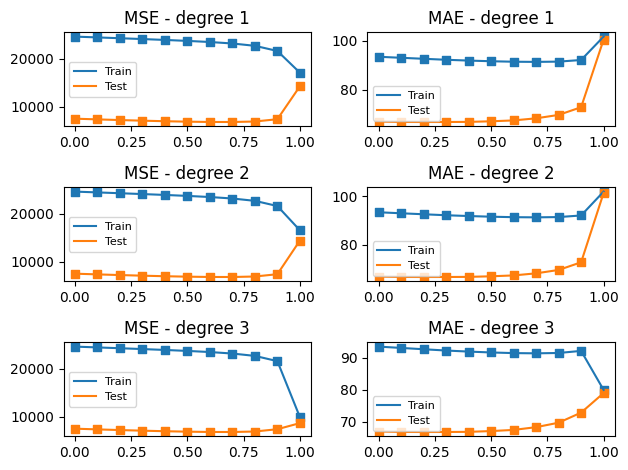

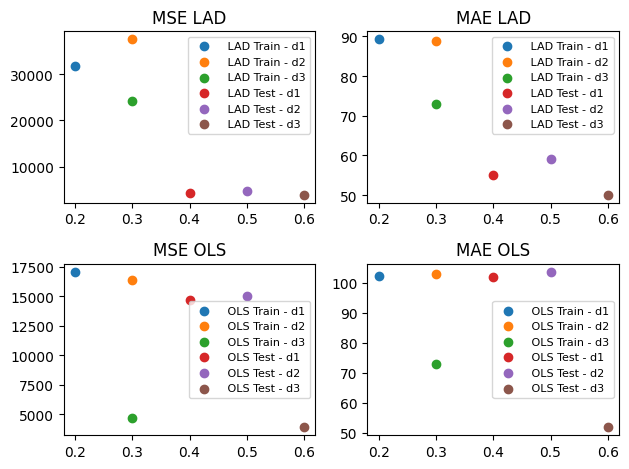

In [9]:
fig, ax = plt.subplots(3,2)

ax[0][0].plot(ratio, MSE_tr_d1, label = 'Train')
ax[0][0].scatter(ratio, MSE_tr_d1,marker = 's')
ax[0][0].plot(ratio, MSE_te_d1, label = 'Test')
ax[0][0].scatter(ratio, MSE_te_d1,marker = 's')


ax[0][0].legend(loc = 'best', prop = {'size' : 8})
ax[0][0].set_title('MSE - degree 1')


#### 

ax[0][1].plot(ratio, MAE_tr_d1, label = 'Train')
ax[0][1].scatter(ratio, MAE_tr_d1,marker = 's')
ax[0][1].plot(ratio, MAE_te_d1, label = 'Test')
ax[0][1].scatter(ratio, MAE_te_d1,marker = 's')


ax[0][1].legend(loc = 'best', prop = {'size' : 8})
ax[0][1].set_title('MAE - degree 1')

####

ax[1][0].plot(ratio, MSE_tr_d2, label = 'Train')
ax[1][0].scatter(ratio, MSE_tr_d2,marker = 's')
ax[1][0].plot(ratio, MSE_te_d2, label = 'Test')
ax[1][0].scatter(ratio, MSE_te_d2,marker = 's')


ax[1][0].legend(loc = 'best', prop = {'size' : 8})
ax[1][0].set_title('MSE - degree 2')

####

ax[1][1].plot(ratio, MAE_tr_d2, label = 'Train')
ax[1][1].scatter(ratio, MAE_tr_d2,marker = 's')
ax[1][1].plot(ratio, MAE_te_d2, label = 'Test')
ax[1][1].scatter(ratio, MAE_te_d2,marker = 's')


ax[1][1].legend(loc = 'best', prop = {'size' : 8})
ax[1][1].set_title('MAE - degree 2')

####

ax[2][0].plot(ratio, MSE_tr_d3, label = 'Train')
ax[2][0].scatter(ratio, MSE_tr_d3,marker = 's')
ax[2][0].plot(ratio, MSE_te_d3, label = 'Test')
ax[2][0].scatter(ratio, MSE_te_d3,marker = 's')


ax[2][0].legend(loc = 'best', prop = {'size' : 8})
ax[2][0].set_title('MSE - degree 3')

####

ax[2][1].plot(ratio, MAE_tr_d3, label = 'Train')
ax[2][1].scatter(ratio, MAE_tr_d3,marker = 's')
ax[2][1].plot(ratio, MAE_te_d3, label = 'Test')
ax[2][1].scatter(ratio, MAE_te_d3,marker = 's')


ax[2][1].legend(loc = 'best', prop = {'size' : 8})
ax[2][1].set_title('MAE - degree 3')


fig.tight_layout()
plt.show()

####

fig ,ax = plt.subplots(2,2)

ax[0][0].scatter(ratio[2], MSE_LAD_tr_d1 , label = ' LAD Train - d1')
ax[0][0].scatter(ratio[3], MSE_LAD_tr_d2 , label = ' LAD Train - d2')
ax[0][0].scatter(ratio[3], MSE_LAD_tr_d3 , label = ' LAD Train - d3')

ax[0][0].scatter(ratio[4], MSE_LAD_te_d1 , label = ' LAD Test - d1')
ax[0][0].scatter(ratio[5], MSE_LAD_te_d2 , label = ' LAD Test - d2')
ax[0][0].scatter(ratio[6], MSE_LAD_te_d3 , label = ' LAD Test - d3')


ax[0][0].legend(loc = 'best', prop = {'size' : 8})
ax[0][0].set_title('MSE LAD')


####  

ax[0][1].scatter(ratio[2], MAE_LAD_tr_d1 , label = ' LAD Train - d1')
ax[0][1].scatter(ratio[3], MAE_LAD_tr_d2 , label = ' LAD Train - d2')
ax[0][1].scatter(ratio[3], MAE_LAD_tr_d3 , label = ' LAD Train - d3')

ax[0][1].scatter(ratio[4], MAE_LAD_te_d1 , label = ' LAD Test - d1')
ax[0][1].scatter(ratio[5], MAE_LAD_te_d2 , label = ' LAD Test - d2')
ax[0][1].scatter(ratio[6], MAE_LAD_te_d3 , label = ' LAD Test - d3')


ax[0][1].legend(loc = 'best', prop = {'size' : 8})
ax[0][1].set_title('MAE LAD')



####

ax[1][0].scatter(ratio[2], MSE_OLS_tr_d1 , label = ' OLS Train - d1')
ax[1][0].scatter(ratio[3], MSE_OLS_tr_d2 , label = ' OLS Train - d2')
ax[1][0].scatter(ratio[3], MSE_OLS_tr_d3 , label = ' OLS Train - d3')

ax[1][0].scatter(ratio[4], MSE_OLS_te_d1 , label = ' OLS Test - d1')
ax[1][0].scatter(ratio[5], MSE_OLS_te_d2 , label = ' OLS Test - d2')
ax[1][0].scatter(ratio[6], MSE_OLS_te_d3 , label = ' OLS Test - d3')


ax[1][0].legend(loc = 'best', prop = {'size' : 8})
ax[1][0].set_title('MSE OLS')


####  

ax[1][1].scatter(ratio[2], MAE_OLS_tr_d1 , label = ' OLS Train - d1')
ax[1][1].scatter(ratio[3], MAE_OLS_tr_d2 , label = ' OLS Train - d2')
ax[1][1].scatter(ratio[3], MAE_LAD_tr_d3 , label = ' OLS Train - d3')

ax[1][1].scatter(ratio[4], MAE_OLS_te_d1 , label = ' OLS Test - d1')
ax[1][1].scatter(ratio[5], MAE_OLS_te_d2 , label = ' OLS Test - d2')
ax[1][1].scatter(ratio[6], MAE_OLS_te_d3 , label = ' OLS Test - d3')


ax[1][1].legend(loc = 'best', prop = {'size' : 8})
ax[1][1].set_title('MAE OLS')



fig.tight_layout()
plt.show()

# <font color = "#F3A505" > Diabetes Estimation Visualization
    
<hr>
 
    
Based on above, with the l1_ratio value of 0.8 we get the best MSE and MAE on both tests and results. Using l1_ratio of 0.8, we can use the estimated $\hat y$ to draw the regression line for each degree and each model (elasticnet, LAD ,and OLS)

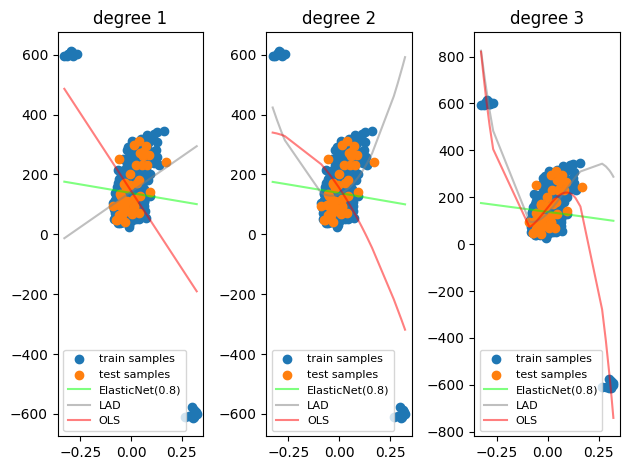

In [10]:
# Based on above 
# l1_ratio of 0.8 is good
# therefore ratio index is 8

ratio_index = 8

fig, ax = plt.subplots(1,3)

ax[0].scatter(diabetes_x_train,diabetes_y_train, label = 'train samples')
ax[0].scatter(diabetes_x_test,diabetes_y_test, label = 'test samples')

# ElasticNet
ax[0].plot(diabetes_x_train,Yhat_tr_d1[ratio_index], color = 'lime',alpha = 0.5, label = 'ElasticNet(0.8)')

# LAD
ax[0].plot(diabetes_x_train,yhat_LAD_tr_d1, color = 'gray',alpha = 0.5, label = 'LAD')

# OLS
ax[0].plot(diabetes_x_train,yhat_OLS_tr_d1, color = 'red',alpha = 0.5 , label = 'OLS')

ax[0].set_title('degree 1' )
ax[0].legend(loc = 'lower left', prop = {'size' : 8})



# degree 2

ax[1].scatter(diabetes_x_train,diabetes_y_train, label = 'train samples')
ax[1].scatter(diabetes_x_test,diabetes_y_test, label = 'test samples')

# ElasticNet
ax[1].plot(diabetes_x_train,Yhat_tr_d2[ratio_index], color = 'lime',alpha = 0.5, label = 'ElasticNet(0.8)')

# LAD
ax[1].plot(diabetes_x_train,yhat_LAD_tr_d2, color = 'gray',alpha = 0.5, label = 'LAD')

# OLS
ax[1].plot(diabetes_x_train,yhat_OLS_tr_d2, color = 'red',alpha = 0.5 , label = 'OLS')

ax[1].set_title('degree 2' )
ax[1].legend(loc = 'lower left', prop = {'size' : 8})


# degree 3

ax[2].scatter(diabetes_x_train,diabetes_y_train, label = 'train samples')
ax[2].scatter(diabetes_x_test,diabetes_y_test, label = 'test samples')

# ElasticNet
ax[2].plot(diabetes_x_train,Yhat_tr_d3[ratio_index], color = 'lime',alpha = 0.5, label = 'ElasticNet(0.8)')

# LAD
ax[2].plot(diabetes_x_train,yhat_LAD_tr_d3, color = 'gray',alpha = 0.5, label = 'LAD')

# OLS
ax[2].plot(diabetes_x_train,yhat_OLS_tr_d3, color = 'red',alpha = 0.5 , label = 'OLS')

ax[2].set_title('degree 3' )
ax[2].legend(loc = 'lower left', prop = {'size' : 8})

fig.tight_layout()
plt.show()

# <font color = "#F3A505" > Numerical Dataset Test and Evaluation
    
<hr>
 
    
Once the models are created, we need to test and evaluate them. To do that, We created a set of variables each corresponds to a specific evaluation type or estimation of train or test datasets on a model. 

In [11]:
# Numerical Dataset

MSE_tr_d1 = []
MAE_tr_d1 = []
MSE_te_d1 = []
MAE_te_d1 = []
Yhat_tr_d1= []
Yhat_te_d1= []

MSE_tr_d2 = []
MAE_tr_d2 = []
MSE_te_d2 = []
MAE_te_d2 = []
Yhat_tr_d2= []
Yhat_te_d2= []

MSE_tr_d3 = []
MAE_tr_d3 = []
MSE_te_d3 = []
MAE_te_d3 = []
Yhat_tr_d3= []
Yhat_te_d3= []

# ElasticNet

for _r in ratio:
    
    # diabetes degree 1 (simple linear regression)
    
    yhat_train = second_models[_r][1].predict(polynomials[1].fit_transform(TrainX.values.reshape(-1,1)))
    yhat_test  = second_models[_r][1].predict(polynomials[1].fit_transform(TestX.values.reshape(-1,1)))
    
    Yhat_tr_d1.append(yhat_train)
    Yhat_te_d1.append(yhat_test)
    
    MSE_tr_d1.append(MSE(TrainY, yhat_train))
    MSE_te_d1.append(MSE(TestY, yhat_test))
    
    MAE_tr_d1.append(MAE(TrainY, yhat_train))
    MAE_te_d1.append(MAE(TestY, yhat_test))
    
    # diabetes degree 2
    
    yhat_train = second_models[_r][2].predict(polynomials[2].fit_transform(TrainX.values.reshape(-1,1)))
    yhat_test  = second_models[_r][2].predict(polynomials[2].fit_transform(TestX.values.reshape(-1,1)))
    
    Yhat_tr_d2.append(yhat_train)
    Yhat_te_d2.append(yhat_test)
    
    MSE_tr_d2.append(MSE(TrainY, yhat_train))
    MSE_te_d2.append(MSE(TestY, yhat_test))
    
    MAE_tr_d2.append(MAE(TrainY, yhat_train))
    MAE_te_d2.append(MAE(TestY, yhat_test))
    
    # diabetes degree 3
    
    yhat_train = second_models[_r][3].predict(polynomials[3].fit_transform(TrainX.values.reshape(-1,1)))
    yhat_test  = second_models[_r][3].predict(polynomials[3].fit_transform(TestX.values.reshape(-1,1)))
    
    Yhat_tr_d3.append(yhat_train)
    Yhat_te_d3.append(yhat_test)
    
    MSE_tr_d3.append(MSE(TrainY, yhat_train))
    MSE_te_d3.append(MSE(TestY, yhat_test))

    MAE_tr_d3.append(MAE(TrainY, yhat_train))
    MAE_te_d3.append(MAE(TestY, yhat_test))
  
 
    
# LAD 

yhat_LAD_tr_d1 = second_models['LAD'][1].predict(polynomials[1].fit_transform(TrainX.values.reshape(-1,1)))
MSE_LAD_tr_d1  = MSE(TrainY, yhat_LAD_tr_d1)
MAE_LAD_tr_d1  = MAE(TrainY, yhat_LAD_tr_d1)

yhat_LAD_tr_d2 = second_models['LAD'][2].predict(polynomials[2].fit_transform(TrainX.values.reshape(-1,1)))
MSE_LAD_tr_d2  = MSE(TrainY, yhat_LAD_tr_d2)
MAE_LAD_tr_d2  = MAE(TrainY, yhat_LAD_tr_d2)

yhat_LAD_tr_d3 = second_models['LAD'][3].predict(polynomials[3].fit_transform(TrainX.values.reshape(-1,1)))
MSE_LAD_tr_d3  = MSE(TrainY, yhat_LAD_tr_d3)
MAE_LAD_tr_d3  = MAE(TrainY, yhat_LAD_tr_d3)

yhat_LAD_te_d1 = second_models['LAD'][1].predict(polynomials[1].fit_transform(TestX.values.reshape(-1,1)))
MSE_LAD_te_d1  = MSE(TestY, yhat_LAD_te_d1)
MAE_LAD_te_d1  = MAE(TestY, yhat_LAD_te_d1)

yhat_LAD_te_d2 = second_models['LAD'][2].predict(polynomials[2].fit_transform(TestX.values.reshape(-1,1)))
MSE_LAD_te_d2  = MSE(TestY, yhat_LAD_te_d2)
MAE_LAD_te_d2  = MAE(TestY, yhat_LAD_te_d2)

yhat_LAD_te_d3 = second_models['LAD'][3].predict(polynomials[3].fit_transform(TestX.values.reshape(-1,1)))
MSE_LAD_te_d3  = MSE(TestY, yhat_LAD_te_d3)
MAE_LAD_te_d3  = MAE(TestY, yhat_LAD_te_d3)


# OLS

yhat_OLS_tr_d1 = second_models['OLS'][1].predict(polynomials[1].fit_transform(TrainX.values.reshape(-1,1)))
MSE_OLS_tr_d1  = MSE(TrainY, yhat_OLS_tr_d1)
MAE_OLS_tr_d1  = MAE(TrainY, yhat_OLS_tr_d1)

yhat_OLS_tr_d2 = second_models['OLS'][2].predict(polynomials[2].fit_transform(TrainX.values.reshape(-1,1)))
MSE_OLS_tr_d2  = MSE(TrainY, yhat_OLS_tr_d2)
MAE_OLS_tr_d2  = MAE(TrainY, yhat_OLS_tr_d2)

yhat_OLS_tr_d3 = second_models['OLS'][3].predict(polynomials[3].fit_transform(TrainX.values.reshape(-1,1)))
MSE_OLS_tr_d3  = MSE(TrainY, yhat_OLS_tr_d3)
MAE_OLS_tr_d3  = MAE(TrainY, yhat_OLS_tr_d3)

yhat_OLS_te_d1 = diabetes_models['OLS'][1].predict(polynomials[1].fit_transform(TestX.values.reshape(-1,1)))
MSE_OLS_te_d1  = MSE(TestY, yhat_OLS_te_d1)
MAE_OLS_te_d1  = MAE(TestY, yhat_OLS_te_d1)

yhat_OLS_te_d2 = second_models['OLS'][2].predict(polynomials[2].fit_transform(TestX.values.reshape(-1,1)))
MSE_OLS_te_d2  = MSE(TestY, yhat_OLS_te_d2)
MAE_OLS_te_d2  = MAE(TestY, yhat_OLS_te_d2)

yhat_OLS_te_d3 = second_models['OLS'][3].predict(polynomials[3].fit_transform(TestX.values.reshape(-1,1)))
MSE_OLS_te_d3  = MSE(TestY, yhat_OLS_te_d3)
MAE_OLS_te_d3  = MAE(TestY, yhat_OLS_te_d3)


# <font color = "#F3A505" > Numerical Dataset MSE and MAE visualization
    
<hr>
 
    
Once the models are evaluated, we can used these results to choose the best model according to our ration.]
    
First 6 plots, each correspond to ElasticNet method using 10 different ratio values and 3 degrees of polynomial.
Second 4 plots, each correspond to LAD and OLS method using 3 degrees of polnomial.

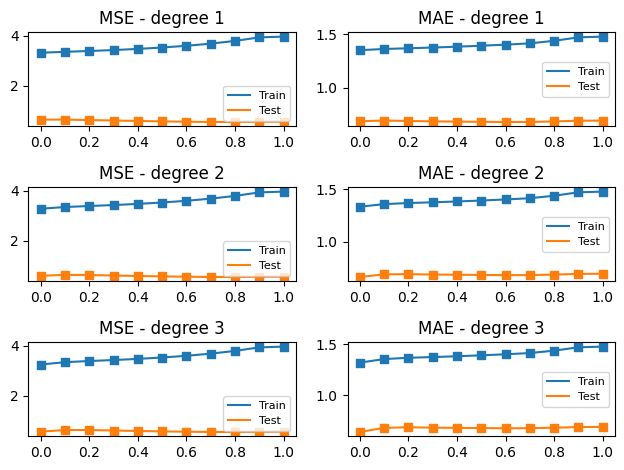

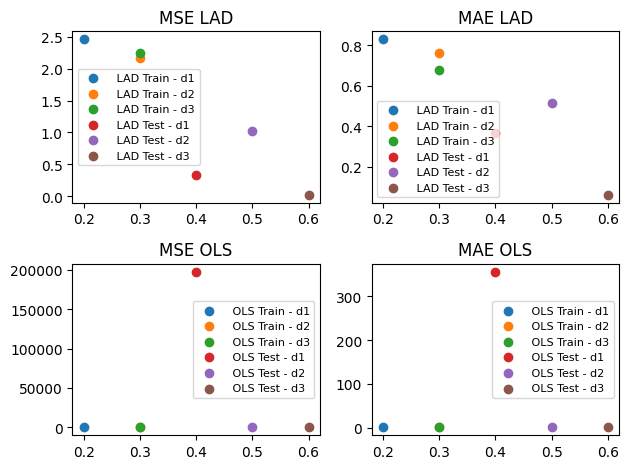

In [12]:
fig, ax = plt.subplots(3,2)

ax[0][0].plot(ratio, MSE_tr_d1, label = 'Train')
ax[0][0].scatter(ratio, MSE_tr_d1,marker = 's')
ax[0][0].plot(ratio, MSE_te_d1, label = 'Test')
ax[0][0].scatter(ratio, MSE_te_d1,marker = 's')


ax[0][0].legend(loc = 'best', prop = {'size' : 8})
ax[0][0].set_title('MSE - degree 1')


#### 

ax[0][1].plot(ratio, MAE_tr_d1, label = 'Train')
ax[0][1].scatter(ratio, MAE_tr_d1,marker = 's')
ax[0][1].plot(ratio, MAE_te_d1, label = 'Test')
ax[0][1].scatter(ratio, MAE_te_d1,marker = 's')


ax[0][1].legend(loc = 'best', prop = {'size' : 8})
ax[0][1].set_title('MAE - degree 1')

####

ax[1][0].plot(ratio, MSE_tr_d2, label = 'Train')
ax[1][0].scatter(ratio, MSE_tr_d2,marker = 's')
ax[1][0].plot(ratio, MSE_te_d2, label = 'Test')
ax[1][0].scatter(ratio, MSE_te_d2,marker = 's')


ax[1][0].legend(loc = 'best', prop = {'size' : 8})
ax[1][0].set_title('MSE - degree 2')

####

ax[1][1].plot(ratio, MAE_tr_d2, label = 'Train')
ax[1][1].scatter(ratio, MAE_tr_d2,marker = 's')
ax[1][1].plot(ratio, MAE_te_d2, label = 'Test')
ax[1][1].scatter(ratio, MAE_te_d2,marker = 's')


ax[1][1].legend(loc = 'best', prop = {'size' : 8})
ax[1][1].set_title('MAE - degree 2')

####

ax[2][0].plot(ratio, MSE_tr_d3, label = 'Train')
ax[2][0].scatter(ratio, MSE_tr_d3,marker = 's')
ax[2][0].plot(ratio, MSE_te_d3, label = 'Test')
ax[2][0].scatter(ratio, MSE_te_d3,marker = 's')


ax[2][0].legend(loc = 'best', prop = {'size' : 8})
ax[2][0].set_title('MSE - degree 3')

####

ax[2][1].plot(ratio, MAE_tr_d3, label = 'Train')
ax[2][1].scatter(ratio, MAE_tr_d3,marker = 's')
ax[2][1].plot(ratio, MAE_te_d3, label = 'Test')
ax[2][1].scatter(ratio, MAE_te_d3,marker = 's')


ax[2][1].legend(loc = 'best', prop = {'size' : 8})
ax[2][1].set_title('MAE - degree 3')


fig.tight_layout()
plt.show()

####

fig ,ax = plt.subplots(2,2)

ax[0][0].scatter(ratio[2], MSE_LAD_tr_d1 , label = ' LAD Train - d1')
ax[0][0].scatter(ratio[3], MSE_LAD_tr_d2 , label = ' LAD Train - d2')
ax[0][0].scatter(ratio[3], MSE_LAD_tr_d3 , label = ' LAD Train - d3')

ax[0][0].scatter(ratio[4], MSE_LAD_te_d1 , label = ' LAD Test - d1')
ax[0][0].scatter(ratio[5], MSE_LAD_te_d2 , label = ' LAD Test - d2')
ax[0][0].scatter(ratio[6], MSE_LAD_te_d3 , label = ' LAD Test - d3')


ax[0][0].legend(loc = 'best', prop = {'size' : 8})
ax[0][0].set_title('MSE LAD')


####  

ax[0][1].scatter(ratio[2], MAE_LAD_tr_d1 , label = ' LAD Train - d1')
ax[0][1].scatter(ratio[3], MAE_LAD_tr_d2 , label = ' LAD Train - d2')
ax[0][1].scatter(ratio[3], MAE_LAD_tr_d3 , label = ' LAD Train - d3')

ax[0][1].scatter(ratio[4], MAE_LAD_te_d1 , label = ' LAD Test - d1')
ax[0][1].scatter(ratio[5], MAE_LAD_te_d2 , label = ' LAD Test - d2')
ax[0][1].scatter(ratio[6], MAE_LAD_te_d3 , label = ' LAD Test - d3')


ax[0][1].legend(loc = 'best', prop = {'size' : 8})
ax[0][1].set_title('MAE LAD')



####

ax[1][0].scatter(ratio[2], MSE_OLS_tr_d1 , label = ' OLS Train - d1')
ax[1][0].scatter(ratio[3], MSE_OLS_tr_d2 , label = ' OLS Train - d2')
ax[1][0].scatter(ratio[3], MSE_OLS_tr_d3 , label = ' OLS Train - d3')

ax[1][0].scatter(ratio[4], MSE_OLS_te_d1 , label = ' OLS Test - d1')
ax[1][0].scatter(ratio[5], MSE_OLS_te_d2 , label = ' OLS Test - d2')
ax[1][0].scatter(ratio[6], MSE_OLS_te_d3 , label = ' OLS Test - d3')


ax[1][0].legend(loc = 'best', prop = {'size' : 8})
ax[1][0].set_title('MSE OLS')


####  

ax[1][1].scatter(ratio[2], MAE_OLS_tr_d1 , label = ' OLS Train - d1')
ax[1][1].scatter(ratio[3], MAE_OLS_tr_d2 , label = ' OLS Train - d2')
ax[1][1].scatter(ratio[3], MAE_LAD_tr_d3 , label = ' OLS Train - d3')

ax[1][1].scatter(ratio[4], MAE_OLS_te_d1 , label = ' OLS Test - d1')
ax[1][1].scatter(ratio[5], MAE_OLS_te_d2 , label = ' OLS Test - d2')
ax[1][1].scatter(ratio[6], MAE_OLS_te_d3 , label = ' OLS Test - d3')


ax[1][1].legend(loc = 'best', prop = {'size' : 8})
ax[1][1].set_title('MAE OLS')



fig.tight_layout()
plt.show()

# <font color = "#F3A505" > Numerical Dataset Estimation Visualization
    
<hr>
 
    
Based on above, with the l1_ratio value of 0.8 we get the best MSE and MAE on both tests and results. Using l1_ratio of 0.6 or 0.0 , we can use the estimated $\hat y$ to draw the regression line for each degree and each model (elasticnet, LAD ,and OLS).
    
In this case, we are just going to use l1_ratio of 0.6. 

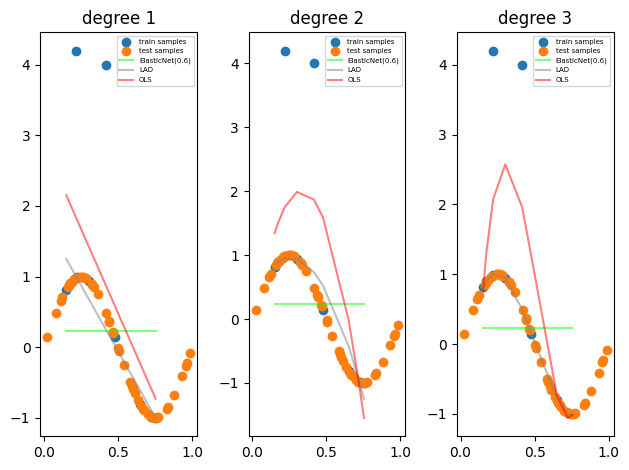

In [13]:
# Based on above 
# l1_ratio of 0.6 is good
# therefore ratio index is 8

ratio_index = 6

fig, ax = plt.subplots(1,3)

ax[0].scatter(TrainX,TrainY, label = 'train samples')
ax[0].scatter(TestX,TestY, label = 'test samples')

# ElasticNet
ax[0].plot(TrainX,Yhat_tr_d1[ratio_index], color = 'lime',alpha = 0.5, label = 'ElasticNet(0.6)')

# LAD
ax[0].plot(TrainX,yhat_LAD_tr_d1, color = 'gray',alpha = 0.5, label = 'LAD')

# OLS
ax[0].plot(TrainX,yhat_OLS_tr_d1, color = 'red',alpha = 0.5 , label = 'OLS')

ax[0].set_title('degree 1' )
ax[0].legend(loc = 'upper right', prop = {'size' : 5})



# degree 2

ax[1].scatter(TrainX,TrainY, label = 'train samples')
ax[1].scatter(TestX,TestY, label = 'test samples')

# ElasticNet
ax[1].plot(TrainX,Yhat_tr_d2[ratio_index], color = 'lime',alpha = 0.5, label = 'ElasticNet(0.6)')

# LAD
ax[1].plot(TrainX,yhat_LAD_tr_d2, color = 'gray',alpha = 0.5, label = 'LAD')

# OLS
ax[1].plot(TrainX,yhat_OLS_tr_d2, color = 'red',alpha = 0.5 , label = 'OLS')

ax[1].set_title('degree 2' )
ax[1].legend(loc = 'upper right', prop = {'size' : 5})


# degree 3

ax[2].scatter(TrainX,TrainY, label = 'train samples')
ax[2].scatter(TestX,TestY, label = 'test samples')

# ElasticNet
ax[2].plot(TrainX,Yhat_tr_d3[ratio_index], color = 'lime',alpha = 0.5, label = 'ElasticNet(0.6)')

# LAD
ax[2].plot(TrainX,yhat_LAD_tr_d3, color = 'gray',alpha = 0.5, label = 'LAD')

# OLS
ax[2].plot(TrainX,yhat_OLS_tr_d3, color = 'red',alpha = 0.5 , label = 'OLS')

ax[2].set_title('degree 3' )
ax[2].legend(loc = 'upper right', prop = {'size' : 5})

fig.tight_layout()
plt.show()


# <font color = "#F3A505" > ElasticNet Behaviour
    
<hr>
 
    
We already know that L1 regularization causes W to be sparse and L2 regularization causes W to be smooth (close to each other). 
In elastic net we combine both L1 and L2 regularization therefore we have a combined result. That is not only W is smooth, it is small.
 
You can also see that ElasticNet in our cases is usually a line.
    
For example take a look at W and $\hat Y$ when we are using ElasticNet (0.6) on the Numerical Dataset with degree 3.
    
Only the intercept is estimated. Therefore ElasticNet is not something that can be handy every time.

In [15]:
xnew_train = polynomials[3].fit_transform(TrainX.values.reshape(-1,1))
xnew_test = polynomials[3].fit_transform(TestX.values.reshape(-1,1))

model = second_models[ratio[6]][3]
model.fit(xnew_train, TrainY.values)


print(" prediction on train :", model.predict(xnew_train))
print(" prediction on test : ", model.predict(xnew_test))
print("\n#############\n")

print("W : ", model.coef_)

 prediction on train : [0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363
 0.2276363 0.2276363 0.2276363]
 prediction on test :  [0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363
 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363
 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363
 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363
 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363
 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363
 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363 0.2276363
 0.2276363]

#############

W :  [ 0.2276363  0.        -0.        -0.       ]
